# Classification Task

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn import svm
from sklearn.model_selection import *
from sklearn.neural_network import *
from sklearn.linear_model import LogisticRegression
from sklearn import tree
import pydotplus
from sklearn import metrics

In [2]:
#dataset loading
df = np.load('unbalanced_final_dataset.pkl')

In [3]:
df = df.apply(lambda c: c.cat.remove_unused_categories())

In [4]:
df.describe()

,DIABETE3,BPHIGH4,DIFFWALK,USEEQUIP,_MICHD,_LMTSCL1,_LMTACT1,QLACTLM2,HAVARTH3,_DRDXAR1,...,VETERAN3,CHCOCNCR,ASTHMA3,SMOKE100,_RFDRHV5,_SMOKER3,HLTHPLN1,CHCSCNCR,SEX,_RFSMOK3
count,364569.0,364569.0,364569.0,364569.0,364569.0,364569.0,364569.0,364569.0,364569.0,364569.0,...,364569.0,364569.0,364569.0,364569.0,364569.0,364569.0,364569.0,364569.0,364569.0,364569.0
unique,2.0,5.0,3.0,3.0,3.0,6.0,5.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,5.0,3.0,3.0,2.0,3.0
top,3.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,4.0,1.0,2.0,2.0,1.0
freq,314851.0,208061.0,299391.0,320855.0,329126.0,237303.0,237303.0,270382.0,237303.0,237303.0,...,315985.0,326700.0,314823.0,204682.0,339320.0,204682.0,338684.0,327439.0,211026.0,311040.0


In [5]:
#Extraction of the features dataframe X and the label vector y
y = df.DIABETE3.astype('category')
X = df.drop('DIABETE3', 1).apply(lambda c: c.astype('category'))

## Select modeling technique
Goal of this step is to select a specific modelling technique e.g. decision-tree, neural network, bayesian model, etc. For the test purpose we select three different algorithms:

* **Decision Tree**: it is a flowchart-like structure representing a disjunction of conjunctions of constraints on the attribute values of instances (i.e., (...∧...∧...)∨(...∧...∧...)∨...). More specifically, each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test and each leaf node represents a class label (decision taken after computing all attributes). Finally the paths from root to leaf represents classification rules. Decision Trees are easy to interpret, and differently to most classification algorithms they are able of selecting the most discriminatory features (i.e. they do not require a feature selection step). However, the complexity is their down side: the learned tree might get too large even after some pruning.
* **Random Forest**: Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. They result having same advantages of a single random tree (except for interpretability) and for most datasets perform better. However, random forests have been observed to overfit for some datasets with noisy classification/regression tasks and are biased in favor of categorical attributes with more levels.
* **AdaBoost**: short for "Adaptive Boosting", is a meta-estimator that begins by fitting a classifier (e.g. a decision tree) on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

We choose as classifier models Decision tree because they are easy to interpret and they do not really require a feature selection step, because they are able to extract the most significative features.

Moreover we define in the following the measures used to analyze the performances of the learned classifiers:

* **Precision**: is the number of True Positives (TP) divided by the number of True Positives and False Positives(FP). Put another way, it is the number of positive predictions divided by the total number of positive class values predicted.
```math #precision
PRECISION = TP / (TP + FP)
```
* **RECALL**: is the number of True Positives (TP) divided by the number of True Positives and the number of False Negatives (FN). Put another way it is the number of positive predictions divided by the number of positive class values in the test data. 
```math #precision
RECALL = TP / (TP + FN)
```
* **F1-SCORE**: it is the harmonic mean of the precision and recall, i.e. 
```math #f1
F1-SCORE = 2* (PRECISION * RECALL)/(PRECISION + RECALL)
``` 

## Evaluate Classification performances
How said before we apply a **10-fold cross validation** in the way to compare the performances of the learned classifiers.
A 10-fold cross validation (and more generally a k-fold cross validation) is a model validation technique for assessing how the results of a statistical analysis will generalize to an independent data set. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice. More precisely, it consists to iteratively partition a sample of data into complementary subsets, performing the analysis on one subset (called the training set), and validating the analysis on the other subset (called the validation set or testing set). To reduce variability, multiple rounds of cross-validation are performed using different partitions, and the validation results are averaged over the rounds.

In [6]:
#Decision Tree
decision_tree = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
decision_tree_score_f1 = cross_val_score(decision_tree, X, y, scoring='f1_weighted', cv=10, n_jobs=-1)
print("f1_weighted: %0.4f (+/- %0.4f)" % (decision_tree_score_f1.mean(), decision_tree_score_f1.std() * 2))

f1_weighted: 0.8021 (+/- 0.0158)


In [7]:
#Random Forest
random_forest = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
random_forest_scores = cross_val_score(random_forest, X, y, scoring='f1_weighted', cv=10, n_jobs=-1)
print("f1_weighted: %0.4f (+/- %0.4f)" % (random_forest_scores.mean(), random_forest_scores.std() * 2))

f1_weighted: 0.8273 (+/- 0.0144)


In [8]:
#Logistic Regression
logistic_model = LogisticRegression()
logistic_model_scores = cross_val_score(logistic_model, X, y, scoring='f1_weighted', cv=10, n_jobs=-1)
print("f1_weighted: %0.4f (+/- %0.4f)" % (logistic_model_scores.mean(), logistic_model_scores.std() * 2))

f1_weighted: 0.8208 (+/- 0.0151)


In [9]:
#AdaBoost
adaboost_model = AdaBoostClassifier(n_estimators=100)
adaboost_model_scores = cross_val_score(adaboost_model, X, y, scoring='f1_weighted', cv=10, n_jobs=-1)
print("f1_weighted: %0.4f (+/- %0.4f)" % (adaboost_model_scores.mean(), adaboost_model_scores.std() * 2))

f1_weighted: 0.8344 (+/- 0.0132)


How we can see all the three approaches have similar performances in terms of F1_score (~80%). 

## Visualization of  learned classifiers
In the following we show an example of Decision tree, Random Forest and AdaBoorst classifiers extracted from the whole training set. In particular we plot the learned tree and the most disctiminative features (score > 10%). 


However, note that, analyzing the extracted tree (and more specifically the split nodes) I have realized that the sckit-learn implementation of Decision trees handle only numerical datasets. This means that the categorical variables are considered as continuous numeric variables.
This makes the classifiers learned with this implementation unreliable and difficult to interpret.

### Analysis of the decision tree classifier
The most discriminative features for the learned decision tree are:
* BPHIGH4 (score 0.53): Have you EVER been told by a doctor, nurse or other health professional that you have high blood pressure?
* DIFFWALK (score DIFFWALK): Do you have serious difficulty walking or climbing stairs?




In [11]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
d_Tree = tree.DecisionTreeClassifier(max_depth=5)
d_Tree = d_Tree.fit(X, y.astype('int'))

In [12]:
from IPython.display import Image  
dot_data = tree.export_graphviz(d_Tree, out_file=None, 
                         feature_names=X.columns.values,  
                         class_names=y.name,  
                         filled=True, rounded=True,  
                         special_characters=True)

In [13]:
graph = pydotplus.graph_from_dot_data(dot_data)  

In [52]:
importances = d_Tree.feature_importances_
indices = np.argsort(importances)[::-1]

In [55]:
print("FEATURE IMPORTANCE_SCORE")
for i in indices[0:10]:
    if(importances[i] > 0 ):
        print (X.columns[i], importances[i])

FEATURE IMPORTANCE_SCORE
BPHIGH4 0.53632557585
DIFFWALK 0.199966220431
DROCDY3_ 0.0920893629047
TOLDHI2 0.0646929615818
PNEUVAC3 0.0570885429547
_MICHD 0.0196945156567
CHCKIDNY 0.0193277296322
_CHOLCHK 0.00684764949131
CHECKUP1 0.00396744149729


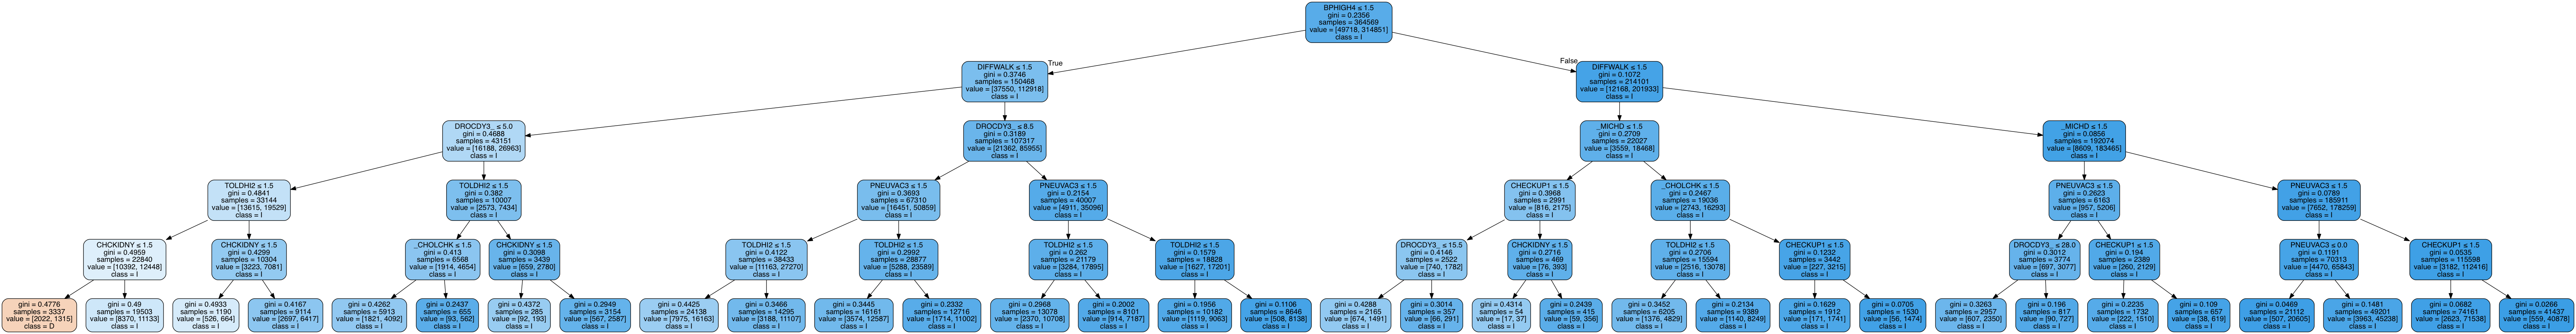

In [56]:
Image(graph.create_png())

### Analysis of the Random forest classifier
The most discriminative features for the learned random forest are completely different from the features extracted by a decision tree. However, differently from a decision tree, in this case there are not any features with high score (>0.10%). In the following we show the top k=5 discriminative features:
* DROCDY3_ (score 0.08): Drink-occasions-per-day
* _EDUCAG (score 0.07): Level of education completed
* INCOME2 (score 0.06): Is your annual household income from all sources ...
* BPHIGH4 (score 0.05): Have you EVER been told by a doctor, nurse or other health professional that you have high blood pressure?
* _INCOMG (score 0.04): Income categories



In [73]:
rf_Tree = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
rf_Tree = rf_Tree.fit(X, y.astype('int'))
importances = rf_Tree.feature_importances_
indices = np.argsort(importances)[::-1]
print("******RANDOM FOREST*******")
for i in indices[0:10]:
    if(importances[i] > 0 ):
        print (X.columns[i], importances[i])

******RANDOM FOREST*******
DROCDY3_ 0.0857201770813
_EDUCAG 0.0711755732111
INCOME2 0.0665133202917
BPHIGH4 0.055380720448
_INCOMG 0.0455599615053
FLUSHOT6 0.034161478251
_SMOKER3 0.0327568400607
TOLDHI2 0.0307713920397
ADDEPEV2 0.029470169495
PNEUVAC3 0.0293719956496


Feature ranking:


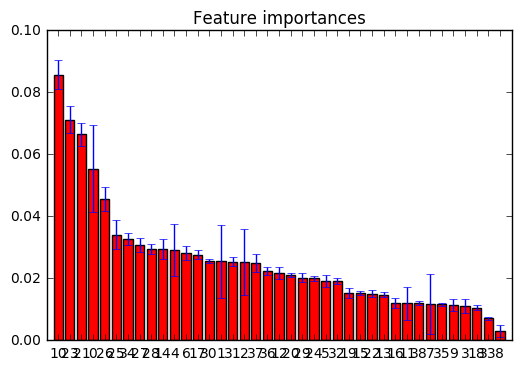

In [74]:
importances = rf_Tree.feature_importances_
indices = np.argsort(importances)[::-1]
std = np.std([tree.feature_importances_ for tree in rf_Tree.estimators_],
             axis=0)
# Print the feature ranking
print("Feature ranking:")


# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


### Analysis of the Ada Boost classifier
Similarly to the Decision Tree classifier, there is only one variable having a high score, while all others have scores close to 0. 
In the following we show the top k=5 discriminative features:
* DROCDY3_ (score 0.22):  Drink-occasions-per-day
* BPHIGH4 (score 0.06): Have you EVER been told by a doctor, nurse or other health professional that you have high blood pressure?
* TOLDHI2 (score 0.06): Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high?
* DIFFWALK (score 0.05): Do you have serious difficulty walking or climbing stairs?
* _INCOMG (score 0.05):  Income categories

In [75]:
adaboost_model = AdaBoostClassifier(n_estimators=100)
adaboost_model = adaboost_model.fit(X, y.astype('int'))
importances = adaboost_model.feature_importances_
indices = np.argsort(importances)[::-1]
print("******ADA BOOST*******")
for i in indices[0:10]:
    if(importances[i] > 0 ):
        print (X.columns[i], importances[i])

******ADA BOOST*******
DROCDY3_ 0.22
BPHIGH4 0.06
TOLDHI2 0.06
DIFFWALK 0.05
_INCOMG 0.05
_SMOKER3 0.04
_CHOLCHK 0.04
_EDUCAG 0.04
INCOME2 0.03
_LMTSCL1 0.03
